<a href="https://colab.research.google.com/github/dldbsrn0120/Car_Recognition/blob/master/vggtest_result_failed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
from google.colab.patches import cv2_imshow
 
from keras_applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
 
from keras.callbacks import ModelCheckpoint
 
from keras.models import Model
 
from keras.preprocessing import image
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from keras.preprocessing.image import ImageDataGenerator
 
from keras import models, layers
from keras import optimizers, initializers, regularizers, metrics
 
from glob import glob
 
import keras
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
import pandas as pd
 
import os
import random

Using TensorFlow backend.


In [3]:
pre_model = VGG16(weights=None, include_top=False, input_shape=(224, 224, 3), backend=keras.backend, layers=keras.layers, models=keras.models, utils=keras.utils)
pre_model.trainable = False
pre_model.summary()
 
# add output layer for VGG16 output (4096 -> 1000 => 4096 -> 1000 -> 100)
additional_model = models.Sequential()
additional_model.add(pre_model)
additional_model.add(layers.Flatten())
additional_model.add(layers.Dense(4096, activation='relu'))
additional_model.add(layers.Dense(1024, activation='relu'))
additional_model.add(layers.Dropout(0.5))
additional_model.add(layers.Dense(3, activation='softmax')) # practical
 
additional_model.summary()
    
additional_model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [4]:
 
train_dir = "/content/drive/My Drive/CarDatabaseShare/kcar_miniset_t/train_set/"
test_dir = "/content/drive/My Drive/CarDatabaseShare/kcar_miniset_t/test_set/"
val_dir = "/content/drive/My Drive/CarDatabaseShare/kcar_miniset_t/valid_set/"
 
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(train_dir, batch_size=16, target_size=(224, 224), color_mode='rgb')
val_generator = val_datagen.flow_from_directory(val_dir, batch_size=16, target_size=(224, 224), color_mode='rgb')
 
# convert color image to grayscale image
 
# to-do

Found 1288 images belonging to 3 classes.
Found 432 images belonging to 3 classes.


In [5]:
import shutil
import json
 
checkpoint = ModelCheckpoint(filepath="/content/drive/My Drive/CarDatabaseShare/t_t_car_weight.hdf5",
                             monitor='loss',
                             mode='min',
                             save_best_only=True
                             )
 
history = additional_model.fit_generator(train_generator, 
            steps_per_epoch=30, 
            epochs=100, 
            validation_data=val_generator, 
            validation_steps=10, 
            callbacks=[checkpoint])
 
additional_model.save_weights("t_t_weights.h5")
print("Saved model to disk")
 
shutil.copy("t_t_weights.h5", "/content/drive/My Drive/CarDatabaseShare/" + "t_t_weights.h5")

Epoch 1/100
30/30 [==============================] - 329s 11s/step - loss: 1.0949 - acc: 0.3833 - val_loss: 1.0850 - val_acc: 0.2812
Epoch 2/100
30/30 [==============================] - 324s 11s/step - loss: 1.0986 - acc: 0.3313 - val_loss: 1.0888 - val_acc: 0.3625
Epoch 3/100
30/30 [==============================] - 223s 7s/step - loss: 1.0958 - acc: 0.3384 - val_loss: 1.1358 - val_acc: 0.3625
Epoch 4/100
30/30 [==============================] - 9s 300ms/step - loss: 1.0975 - acc: 0.3313 - val_loss: 1.0895 - val_acc: 0.3625
Epoch 5/100
30/30 [==============================] - 9s 299ms/step - loss: 1.0941 - acc: 0.3583 - val_loss: 1.0867 - val_acc: 0.3812
Epoch 6/100
30/30 [==============================] - 9s 299ms/step - loss: 1.0839 - acc: 0.4104 - val_loss: 1.0444 - val_acc: 0.3875
Epoch 7/100
30/30 [==============================] - 9s 303ms/step - loss: 1.0945 - acc: 0.3604 - val_loss: 1.1429 - val_acc: 0.3750
Epoch 8/100
30/30 [==============================] - 9s 300ms/step - l

'/content/drive/My Drive/CarDatabaseShare/t_t_weights.h5'

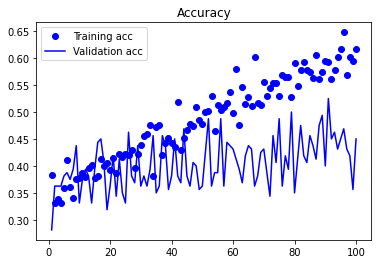

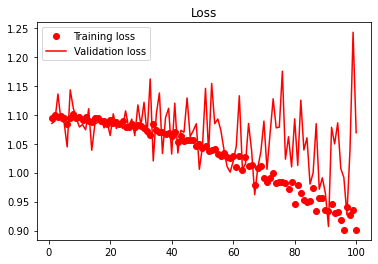

In [6]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
 
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
 
plt.show()

In [7]:
history = additional_model.fit_generator(train_generator, 
            steps_per_epoch=30, 
            epochs=100, 
            validation_data=val_generator, 
            validation_steps=10, 
            callbacks=[checkpoint])
 
additional_model.save_weights("t_t_weights.h5")
print("Saved model to disk")
 
shutil.copy("t_t_weights.h5", "/content/drive/My Drive/CarDatabaseShare/" + "t_t_weights.h5")

Epoch 1/100
30/30 [==============================] - 9s 306ms/step - loss: 0.9195 - acc: 0.6062 - val_loss: 1.2001 - val_acc: 0.3938
Epoch 2/100
30/30 [==============================] - 9s 299ms/step - loss: 0.8981 - acc: 0.6250 - val_loss: 1.0145 - val_acc: 0.4375
Epoch 3/100
30/30 [==============================] - 9s 299ms/step - loss: 0.9135 - acc: 0.5890 - val_loss: 1.0274 - val_acc: 0.4187
Epoch 4/100
30/30 [==============================] - 9s 299ms/step - loss: 0.8989 - acc: 0.6250 - val_loss: 1.0627 - val_acc: 0.3625
Epoch 5/100
30/30 [==============================] - 9s 298ms/step - loss: 0.9091 - acc: 0.5958 - val_loss: 0.9852 - val_acc: 0.4563
Epoch 6/100
30/30 [==============================] - 9s 300ms/step - loss: 0.8943 - acc: 0.6333 - val_loss: 1.1125 - val_acc: 0.3938
Epoch 7/100
30/30 [==============================] - 9s 297ms/step - loss: 0.8951 - acc: 0.6059 - val_loss: 1.0208 - val_acc: 0.4750
Epoch 8/100
30/30 [==============================] - 9s 301ms/step - 

'/content/drive/My Drive/CarDatabaseShare/t_t_weights.h5'

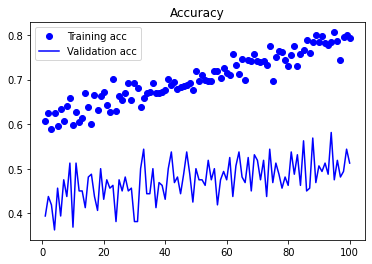

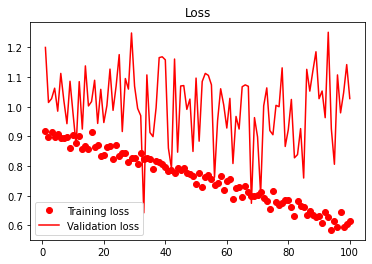

In [8]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
 
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
 
plt.show()

In [9]:
history = additional_model.fit_generator(train_generator, 
            steps_per_epoch=30, 
            epochs=100, 
            validation_data=val_generator, 
            validation_steps=10, 
            callbacks=[checkpoint])
 
additional_model.save_weights("t_t_f_weights.h5")
print("Saved model to disk")
 
shutil.copy("t_t_f_weights.h5", "/content/drive/My Drive/CarDatabaseShare/" + "t_t_f_weights.h5")

Epoch 1/100
30/30 [==============================] - 9s 302ms/step - loss: 0.5676 - acc: 0.8072 - val_loss: 0.8454 - val_acc: 0.4938
Epoch 2/100
30/30 [==============================] - 9s 298ms/step - loss: 0.6298 - acc: 0.7688 - val_loss: 1.0528 - val_acc: 0.5063
Epoch 3/100
30/30 [==============================] - 9s 300ms/step - loss: 0.5821 - acc: 0.8062 - val_loss: 0.8362 - val_acc: 0.5688
Epoch 4/100
30/30 [==============================] - 9s 299ms/step - loss: 0.5770 - acc: 0.8136 - val_loss: 1.0448 - val_acc: 0.5125
Epoch 5/100
30/30 [==============================] - 9s 299ms/step - loss: 0.5699 - acc: 0.8188 - val_loss: 0.8657 - val_acc: 0.5250
Epoch 6/100
30/30 [==============================] - 9s 300ms/step - loss: 0.5800 - acc: 0.8146 - val_loss: 1.3397 - val_acc: 0.5250
Epoch 7/100
30/30 [==============================] - 9s 299ms/step - loss: 0.5905 - acc: 0.7875 - val_loss: 0.8797 - val_acc: 0.5750
Epoch 8/100
30/30 [==============================] - 9s 298ms/step - 

'/content/drive/My Drive/CarDatabaseShare/t_t_f_weights.h5'

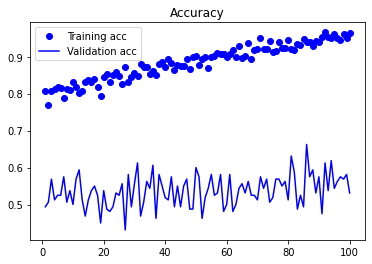

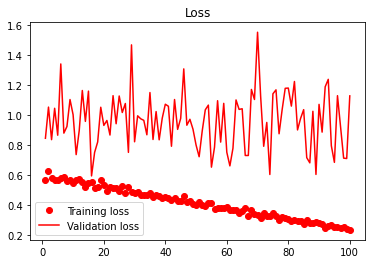

In [10]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Accuracy')
plt.legend()
plt.figure()
 
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()
 
plt.show()

In [13]:
test_generator = test_datagen.flow_from_directory(test_dir, batch_size=16, target_size=(224, 224), color_mode='rgb')

scores = additional_model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(additional_model.metrics_names[1], scores[1]*100))

Found 428 images belonging to 3 classes.
acc: 33.75%


In [0]:
test_generator = test_datagen.flow_from_directory(test_dir, batch_size=16, target_size=(224, 224), color_mode='rgb')

scores = additional_model.evaluate_generator(test_generator, steps=5)
print("%s: %.2f%%" %(additional_model.metrics_names[1], scores[1]*100))